In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
## Lets Create synthetic data points
from sklearn.datasets import make_regression

In [5]:
x , y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [6]:
x

array([[ 0.71764146,  1.50755273],
       [ 0.0753913 , -0.74206153],
       [-0.12839257,  0.21370503],
       ...,
       [ 0.84531873,  0.11634085],
       [-1.59900858,  0.41400927],
       [-0.82624458,  1.36438291]])

In [7]:
y

array([ 1.57089409e+02, -4.79918011e+01,  1.74250497e+00, -5.41328496e+01,
        1.69209316e+02, -1.09276117e+00, -1.25944033e+02, -4.38942204e+01,
       -2.16867614e+01,  5.52323197e+01, -7.72625234e+01,  1.62588034e+01,
       -9.56341123e+01,  4.25548202e+01,  6.96009394e+01,  5.57314039e+01,
       -2.29104899e+01, -1.98145607e+01,  1.50168153e+01,  1.05111077e+02,
       -6.93562391e+01, -1.09992508e+02, -1.48913973e+02, -1.66624718e+02,
       -1.64128112e+02, -1.19474807e+02,  4.60287817e+01,  2.24788583e+02,
       -3.74012611e+01,  9.90321107e+01, -1.07840333e+02,  1.60325769e+02,
       -1.05125048e+02,  5.99724673e+00,  2.15918488e+02, -1.13063271e+02,
       -9.51464847e+00, -1.59494930e+02, -5.43690992e+01,  2.20439659e+02,
       -6.56898607e+01, -2.12835548e+02, -5.44116932e+01,  7.44315899e+01,
       -3.81202510e+01, -1.33202367e+02, -7.28321557e+01,  6.38564436e+01,
        1.18445667e+02,  1.00498406e+01, -7.25538737e+01,  7.60592632e+01,
       -2.52135476e+01, -

In [8]:
pd.DataFrame(x)[0]

0      0.717641
1      0.075391
2     -0.128393
3     -0.208600
4      0.856640
         ...   
995    0.059624
996   -1.134621
997    0.845319
998   -1.599009
999   -0.826245
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

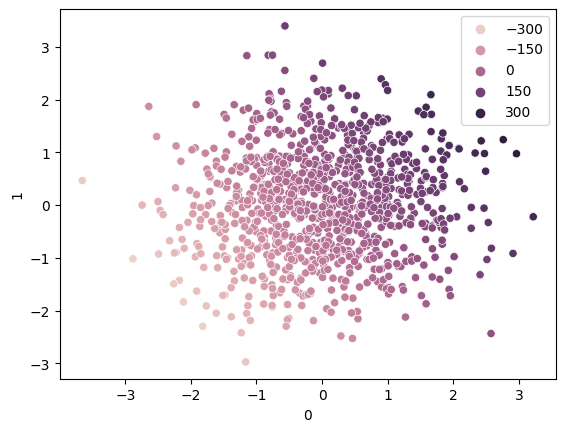

In [9]:
sns.scatterplot(x = pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=10)

In [11]:
from sklearn.svm import SVR

In [12]:
svr = SVR(kernel = 'linear')

In [13]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[88.36214881, 61.26047004]])

In [17]:
## Prediction 
y_pred = svr.predict(x_test)

In [18]:
y_pred

array([  43.38122947, -152.30795837,   96.56349726,   82.94865275,
       -102.02376017,  -59.48072736,  140.77413257,  -46.4805306 ,
         20.97582594,   -6.10892284,    6.46721727,  249.89512883,
        115.06649393,  166.91555391,  -99.20678818,   74.38697004,
        -27.72035911,   -3.50015328,  -22.58812891,  -34.63526943,
       -179.6366776 ,    6.06743202,  -37.5125391 , -121.99279887,
        -69.95170623,  -22.71450961,  141.83813219,  117.88270173,
          1.64566046,   79.40788247, -132.89910777,   28.74945616,
        -32.1750654 ,   -2.96950794,   26.79087436,  -62.91652722,
         63.62832224,  135.22190508,  -35.30939477, -267.87174829,
       -238.2904786 , -254.31347744,   12.87302405,  123.90085735,
        -75.84311268, -216.7651624 ,  168.94610715,  -32.24757455,
        -16.48445264,  163.24529308,  226.41902981,  173.28026686,
       -171.19350339, -135.05243153,  -75.57470664,   44.37986956,
        -56.077596  ,   11.32182756, -256.92199962, -145.46150

In [19]:
from sklearn.metrics import r2_score

In [20]:
print(r2_score(y_test,y_pred))

0.9993152896003412


# HyperParameter Tunning With SVC

In [30]:
from sklearn.model_selection import GridSearchCV

# Defining Parameter range

param_grid = {'C' : [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel':['linear'],
              'epsilon': [0.1,0.2,0.3]
             }

In [31]:
grid = GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose = 3)

In [32]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.683 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.681 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.687 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.680 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.680 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.683 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.681 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.687 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.680 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.680 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsi

[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 tot

[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=

[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.6s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.6s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.5s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.7s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.6s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.6s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [33]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [34]:
## Preiction
y_pred4 = grid.predict(x_test)
print(r2_score(y_test,y_pred))

0.9993152896003412
